## CLASSIFICATION OF PARKISON'S DISEASE DATA

Equipe :
    * Jéssica Villar - 1613176
    * Fernando Tancini - 1711799
    * Andrea Mourelo - 1820000

In [1]:
import pandas as pd
import numpy as np

# Bibliotecas e funções de visualização
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Arial')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
# Set a seed value: 
seed_value= 1001004  
# 1. Set PYTHONHASHSEED environment variable at a fixed value: 
import os
os.environ['PYTHONHASHSEED']=str(seed_value) 
# 2. Set python built-in pseudo-random generator at a fixed value:
import random
random.seed(seed_value) 
# 3. Set numpy pseudo-random generator at a fixed value:
np.random.seed(seed_value) 

In [3]:
filename = 'parkinsons.data'
dfParkinson = pd.read_csv(filename)

In [4]:
dfParkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
outcome_column = 'status'
# status: 0: healthy, 1: Parkinson's
outcome_labels = {0: 'healthy', 1:'Parkinson`s'}
label_counts = np.bincount(dfParkinson.status)
print(label_counts)

[ 48 147]


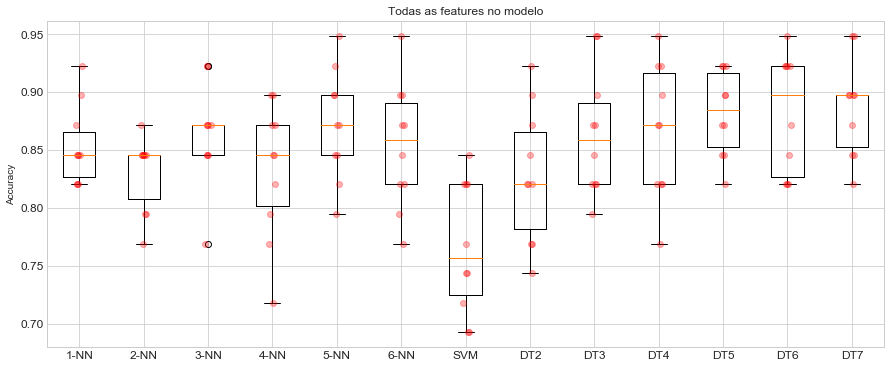

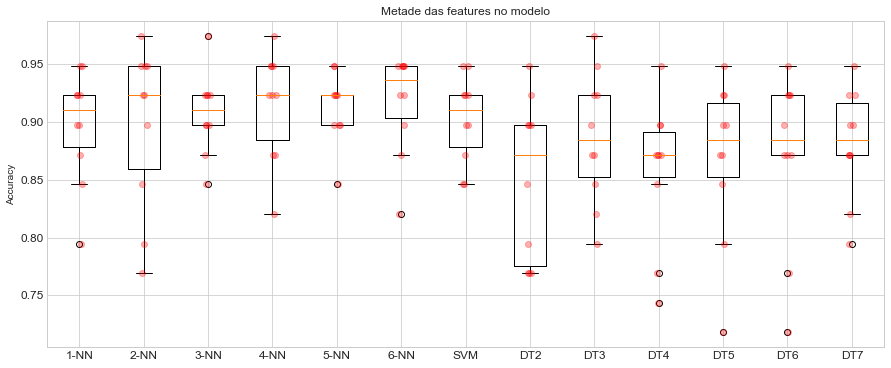

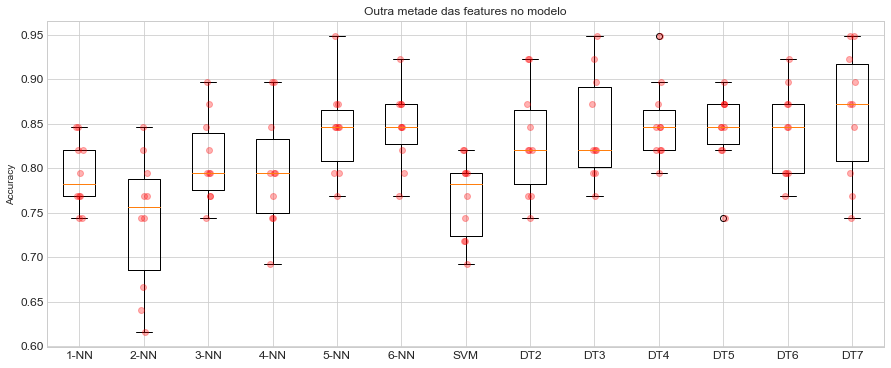

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
# Set a seed value: 
seed_value= 1001001 
# 1. Set PYTHONHASHSEED environment variable at a fixed value: 
import os
os.environ['PYTHONHASHSEED']=str(seed_value) 
# 2. Set python built-in pseudo-random generator at a fixed value:
import random
random.seed(seed_value) 
# 3. Set numpy pseudo-random generator at a fixed value:
np.random.seed(seed_value)


# Selecionamos todas as colunas como features, menos 'name' e 'status', essa última sendo nosso target.
features_all = [col for col in dfParkinson.columns if col not in ['name', 'status']]

# Seleccionamos aleatoriamente metade das colunas
features_half = []
features_other_half = []
num_columns = len(features_all)
random_columns = sorted(random.sample(range(0, num_columns), int(num_columns/2)))
for i in range(len(features_all)):
    if (i in random_columns): 
        features_half.append(features_all[i])
    else : 
        features_other_half.append(features_all[i])

# Vamos a guardar as acuracias, precision, recall e f1_score de todos os modelos
# Essas listas terao 2 objetos cada uma
acuracias = []
precisions = []
recalls = []
f1_scores = []

# Aplicamos 13 modelos a esses dois tipos de dados
features = [features_all, features_half, features_other_half]
PRC = 0.2  # 20% dos dados de teste

for j in range(3):
    # convert feature dataframe and label series to arrays
    X = np.array(dfParkinson[features[j]]) # X = array de dados dos pacientes
    #print("Features da primeira instância: ", X[0, :])

    Y = np.array(dfParkinson[outcome_column]) # Y = outcome "status" dos pacientes
    #print("Target da primeira instância: ", Y[0])

    # run 10 times, generating 13 models each time
    acc_r=np.zeros((10,13))
    precision_r=np.zeros((10,13))
    recall_r=np.zeros((10,13))
    f1_score_r=np.zeros((10,13))

    # 10 iterations
    for i in range(10):
        # Controlamos que os valores sejam sempre os mesmos,
        # Mas cada iteraçao deve ter dados diferentes para nao obter sempre a mesma accuracy
        seed = seed_value + i*1200 
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=PRC,random_state = seed)


        # configure 4 types of models
        nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) 
        nn2 = neighbors.KNeighborsClassifier(n_neighbors=2) 
        nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) 
        nn4 = neighbors.KNeighborsClassifier(n_neighbors=4)
        nn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
        nn6 = neighbors.KNeighborsClassifier(n_neighbors=6)
        svc = svm.SVC(gamma='auto') # SVM
        dt2 = tree.DecisionTreeClassifier(max_depth = 2) # Decision Tree
        dt3 = tree.DecisionTreeClassifier(max_depth = 3) # Decision Tree
        dt4 = tree.DecisionTreeClassifier(max_depth = 4) # Decision Tree
        dt5 = tree.DecisionTreeClassifier(max_depth = 5) # Decision Tree
        dt6 = tree.DecisionTreeClassifier(max_depth = 6) # Decision Tree
        dt7 = tree.DecisionTreeClassifier(max_depth = 7) # Decision Tree

        # train each model
        nn1.fit(X_train,Y_train)
        nn2.fit(X_train,Y_train)
        nn3.fit(X_train,Y_train)
        nn4.fit(X_train,Y_train)
        nn5.fit(X_train,Y_train)
        nn6.fit(X_train,Y_train)
        svc.fit(X_train,Y_train)
        dt2.fit(X_train,Y_train)
        dt3.fit(X_train,Y_train)
        dt4.fit(X_train,Y_train)
        dt5.fit(X_train,Y_train)
        dt6.fit(X_train,Y_train)
        dt7.fit(X_train,Y_train)

        # test each model
        Yhat_nn1=nn1.predict(X_test)
        Yhat_nn2=nn2.predict(X_test)
        Yhat_nn3=nn3.predict(X_test)
        Yhat_nn4=nn4.predict(X_test)
        Yhat_nn5=nn5.predict(X_test)
        Yhat_nn6=nn6.predict(X_test)
        Yhat_svc=svc.predict(X_test)
        Yhat_dt2=dt2.predict(X_test)
        Yhat_dt3=dt3.predict(X_test)
        Yhat_dt4=dt4.predict(X_test)
        Yhat_dt5=dt5.predict(X_test)
        Yhat_dt6=dt6.predict(X_test)
        Yhat_dt7=dt7.predict(X_test)

        # accuracy of each model at this iteration
        acc_r[i][0] = metrics.accuracy_score(Yhat_nn1, Y_test)
        acc_r[i][1] = metrics.accuracy_score(Yhat_nn2, Y_test)
        acc_r[i][2] = metrics.accuracy_score(Yhat_nn3, Y_test)
        acc_r[i][3] = metrics.accuracy_score(Yhat_nn4, Y_test)
        acc_r[i][4] = metrics.accuracy_score(Yhat_nn5, Y_test)
        acc_r[i][5] = metrics.accuracy_score(Yhat_nn6, Y_test)
        acc_r[i][6] = metrics.accuracy_score(Yhat_svc, Y_test)
        acc_r[i][7] = metrics.accuracy_score(Yhat_dt2, Y_test)
        acc_r[i][8] = metrics.accuracy_score(Yhat_dt3, Y_test)
        acc_r[i][9] = metrics.accuracy_score(Yhat_dt4, Y_test)
        acc_r[i][10] = metrics.accuracy_score(Yhat_dt5, Y_test)
        acc_r[i][11] = metrics.accuracy_score(Yhat_dt6, Y_test)
        acc_r[i][12] = metrics.accuracy_score(Yhat_dt7, Y_test)
        
        # precision of each model at this iteration
        precision_r[i][0] = metrics.precision_score(Yhat_nn1, Y_test)
        precision_r[i][1] = metrics.precision_score(Yhat_nn2, Y_test)
        precision_r[i][2] = metrics.precision_score(Yhat_nn3, Y_test)
        precision_r[i][3] = metrics.precision_score(Yhat_nn4, Y_test)
        precision_r[i][4] = metrics.precision_score(Yhat_nn5, Y_test)
        precision_r[i][5] = metrics.precision_score(Yhat_nn6, Y_test)
        precision_r[i][6] = metrics.precision_score(Yhat_svc, Y_test)
        precision_r[i][7] = metrics.precision_score(Yhat_dt2, Y_test)
        precision_r[i][8] = metrics.precision_score(Yhat_dt3, Y_test)
        precision_r[i][9] = metrics.precision_score(Yhat_dt4, Y_test)
        precision_r[i][10] = metrics.precision_score(Yhat_dt5, Y_test)
        precision_r[i][11] = metrics.precision_score(Yhat_dt6, Y_test)
        precision_r[i][12] = metrics.precision_score(Yhat_dt7, Y_test)

        # recall of each model at this iteration
        recall_r[i][0] = metrics.recall_score(Yhat_nn1, Y_test)
        recall_r[i][1] = metrics.recall_score(Yhat_nn2, Y_test)
        recall_r[i][2] = metrics.recall_score(Yhat_nn3, Y_test)
        recall_r[i][3] = metrics.recall_score(Yhat_nn4, Y_test)
        recall_r[i][4] = metrics.recall_score(Yhat_nn5, Y_test)
        recall_r[i][5] = metrics.recall_score(Yhat_nn6, Y_test)
        recall_r[i][6] = metrics.recall_score(Yhat_svc, Y_test)
        recall_r[i][7] = metrics.recall_score(Yhat_dt2, Y_test)
        recall_r[i][8] = metrics.recall_score(Yhat_dt3, Y_test)
        recall_r[i][9] = metrics.recall_score(Yhat_dt4, Y_test)
        recall_r[i][10] = metrics.recall_score(Yhat_dt5, Y_test)
        recall_r[i][11] = metrics.recall_score(Yhat_dt6, Y_test)
        recall_r[i][12] = metrics.recall_score(Yhat_dt7, Y_test)

        # f1_score of each model at this iteration
        f1_score_r[i][0] = metrics.f1_score(Yhat_nn1, Y_test)
        f1_score_r[i][1] = metrics.f1_score(Yhat_nn2, Y_test)
        f1_score_r[i][2] = metrics.f1_score(Yhat_nn3, Y_test)
        f1_score_r[i][3] = metrics.f1_score(Yhat_nn4, Y_test)
        f1_score_r[i][4] = metrics.f1_score(Yhat_nn5, Y_test)
        f1_score_r[i][5] = metrics.f1_score(Yhat_nn6, Y_test)
        f1_score_r[i][6] = metrics.f1_score(Yhat_svc, Y_test)
        f1_score_r[i][7] = metrics.f1_score(Yhat_dt2, Y_test)
        f1_score_r[i][8] = metrics.f1_score(Yhat_dt3, Y_test)
        f1_score_r[i][9] = metrics.f1_score(Yhat_dt4, Y_test)
        f1_score_r[i][10] = metrics.f1_score(Yhat_dt5, Y_test)
        f1_score_r[i][11] = metrics.f1_score(Yhat_dt6, Y_test)
        f1_score_r[i][12] = metrics.f1_score(Yhat_dt7, Y_test)

    acuracias.append(acc_r)
    precisions.append(precision_r)
    recalls.append(recall_r)
    f1_scores.append(f1_score_r)
    
    # Plot
    plt.figure(figsize=(15,6))
    plt.boxplot(acc_r)
    for i in range(13):
        xderiv = (i+1) * np.ones(acc_r[:,i].shape) + (np.random.rand(10,)-0.5) * 0.1
        plt.plot(xderiv, acc_r[:,i], 'ro', alpha=0.3)

    ax = plt.gca()
    ax.set_xticklabels(['1-NN', '2-NN','3-NN', '4-NN','5-NN', '6-NN','SVM',
                        'DT2','DT3','DT4','DT5','DT6','DT7'])
    plt.ylabel('Accuracy')
    
    if (j==0): ax.set_title("Todas as features no modelo")
    if (j==1): ax.set_title("Metade das features no modelo")
    if (j==2): ax.set_title("Outra metade das features no modelo")

    plt.show()

    #plt.savefig('figs/error_ms_1.png',dpi=300, bbox_inches='tight')

# Analise das medias das accuracy, precision, recall e f1_score

## Quando usamos todas as features

In [7]:
models = ['1-NN', '2-NN','3-NN', '4-NN','5-NN', '6-NN','SVM','DT2','DT3','DT4','DT5','DT6','DT7']

acuracias_all = pd.DataFrame(acuracias[0])
precisions_all = pd.DataFrame(precisions[0])
recalls_all = pd.DataFrame(recalls[0])
f1_scores_all = pd.DataFrame(f1_scores[0])
acuracias_all.columns, precisions_all.columns = models, models
recalls_all.columns, f1_scores_all.columns = models, models

# So para entender, print de acuracias_all:
acuracias_all
# As colunas representam os modelos e as linhas as iteraçoes feitas (com dados de teste diferentes)

,1-NN,2-NN,3-NN,4-NN,5-NN,6-NN,SVM,DT2,DT3,DT4,DT5,DT6,DT7
0,0.820513,0.846154,0.846154,0.769231,0.923077,0.871795,0.820513,0.871795,0.897436,0.923077,0.897436,0.923077,0.948718
1,0.846154,0.846154,0.923077,0.897436,0.846154,0.871795,0.743590,0.820513,0.871795,0.871795,0.897436,0.871795,0.897436
2,0.846154,0.871795,0.846154,0.871795,0.897436,0.897436,0.743590,0.769231,0.871795,0.820513,0.923077,0.923077,0.897436
3,0.820513,0.769231,0.769231,0.717949,0.794872,0.769231,0.692308,0.769231,0.794872,0.948718,0.871795,0.923077,0.871795
4,0.871795,0.846154,0.871795,0.846154,0.871795,0.846154,0.846154,0.820513,0.820513,0.820513,0.846154,0.820513,0.820513
5,0.923077,0.794872,0.871795,0.794872,0.897436,0.794872,0.820513,0.846154,0.846154,0.871795,0.846154,0.820513,0.897436
6,0.820513,0.846154,0.871795,0.871795,0.871795,0.897436,0.769231,0.897436,0.948718,0.897436,0.923077,0.923077,0.897436
7,0.846154,0.794872,0.871795,0.820513,0.846154,0.820513,0.692308,0.820513,0.820513,0.769231,0.871795,0.846154,0.846154
8,0.897436,0.846154,0.846154,0.846154,0.820513,0.820513,0.717949,0.743590,0.820513,0.820513,0.820513,0.820513,0.846154
9,0.846154,0.846154,0.923077,0.897436,0.948718,0.948718,0.820513,0.923077,0.948718,0.923077,0.923077,0.948718,0.948718


In [8]:
analise = pd.DataFrame(acuracias_all.mean(), columns = ['Accuracy'])
analise['Precision'] = pd.DataFrame(precisions_all.mean())
analise['Recall'] = pd.DataFrame(recalls_all.mean())
analise['F1_Score'] = pd.DataFrame(f1_scores_all.mean())
analise = analise.T
analise

,1-NN,2-NN,3-NN,4-NN,5-NN,6-NN,SVM,DT2,DT3,DT4,DT5,DT6,DT7
Accuracy,0.853846,0.830769,0.864103,0.833333,0.871795,0.853846,0.766667,0.828205,0.864103,0.866667,0.882051,0.882051,0.887179
Precision,0.902339,0.831797,0.943642,0.891723,0.971855,0.927258,1.000000,0.971808,0.932724,0.933114,0.930368,0.930226,0.947703
Recall,0.898548,0.928807,0.879778,0.881888,0.868448,0.880924,0.759422,0.824900,0.890279,0.891269,0.912196,0.911960,0.903623
F1_Score,0.900092,0.876876,0.909765,0.885109,0.916372,0.900975,0.862137,0.891621,0.908753,0.910912,0.920040,0.919919,0.924413


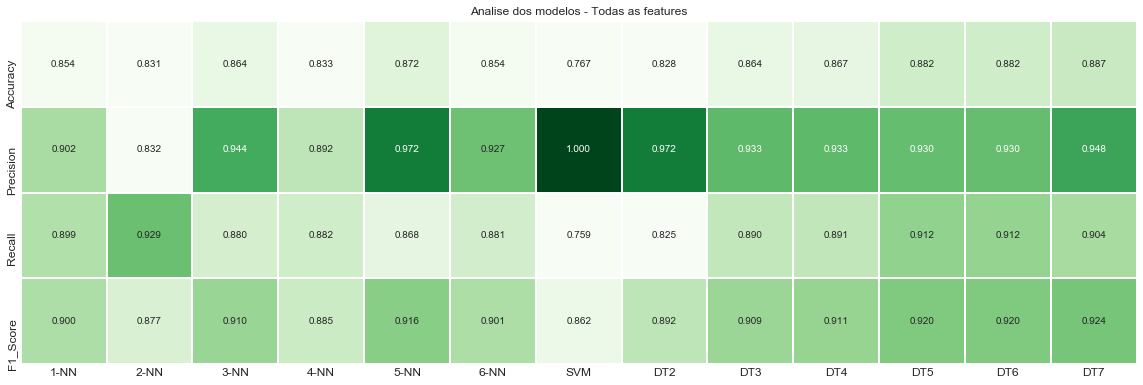

In [9]:
plt.figure(figsize=(20,20))
plt.title('Analise dos modelos - Todas as features')
sns.heatmap(analise, annot=True, square=True, cbar=False, fmt=".3f", linewidths=0.95, cmap='Greens', vmin = 0.85)
pass

## Quando usamos uma metade as features

In [10]:
acuracias_half = pd.DataFrame(acuracias[1])
precisions_half = pd.DataFrame(precisions[1])
recalls_half = pd.DataFrame(recalls[1])
f1_scores_half = pd.DataFrame(f1_scores[1])
acuracias_half.columns, precisions_half.columns = models, models
recalls_half.columns, f1_scores_half.columns = models, models

analise_half = pd.DataFrame(acuracias_half.mean(), columns = ['Accuracy'])
analise_half['Precision'] = pd.DataFrame(precisions_half.mean())
analise_half['Recall'] = pd.DataFrame(recalls_half.mean())
analise_half['F1_Score'] = pd.DataFrame(f1_scores_half.mean())
analise_half = analise_half.T
analise_half

,1-NN,2-NN,3-NN,4-NN,5-NN,6-NN,SVM,DT2,DT3,DT4,DT5,DT6,DT7
Accuracy,0.897436,0.897436,0.907692,0.915385,0.912821,0.917949,0.902564,0.851282,0.887179,0.858974,0.869231,0.871795,0.882051
Precision,0.939823,0.887892,0.960897,0.944147,0.965073,0.954553,0.975371,0.964603,0.930284,0.902138,0.912579,0.913306,0.924190
Recall,0.920780,0.969445,0.916740,0.940061,0.919573,0.934821,0.899309,0.852294,0.917161,0.905631,0.909197,0.913642,0.916859
F1_Score,0.929409,0.924815,0.937619,0.941223,0.940985,0.943433,0.935352,0.904161,0.922632,0.902387,0.909510,0.911827,0.919054


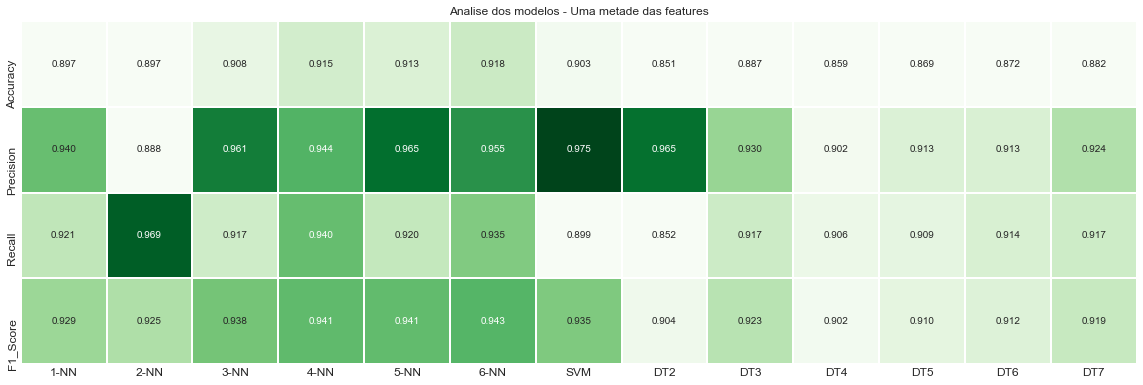

In [11]:
plt.figure(figsize=(20,20))
plt.title('Analise dos modelos - Uma metade das features')
sns.heatmap(analise_half, annot=True, square=True, cbar=False, fmt=".3f", linewidths=0.95, cmap='Greens', 
            vmin = 0.9)
pass

## Quando usamos a outra metade as features

In [12]:
acuracias_other_half = pd.DataFrame(acuracias[2])
precisions_other_half = pd.DataFrame(precisions[2])
recalls_other_half = pd.DataFrame(recalls[2])
f1_scores_other_half = pd.DataFrame(f1_scores[2])
acuracias_other_half.columns, precisions_other_half.columns = models, models
recalls_other_half.columns, f1_scores_other_half.columns = models, models

analise_other_half = pd.DataFrame(acuracias_other_half.mean(), columns = ['Accuracy'])
analise_other_half['Precision'] = pd.DataFrame(precisions_other_half.mean())
analise_other_half['Recall'] = pd.DataFrame(recalls_other_half.mean())
analise_other_half['F1_Score'] = pd.DataFrame(f1_scores_other_half.mean())
analise_other_half = analise_other_half.T
analise_other_half

,1-NN,2-NN,3-NN,4-NN,5-NN,6-NN,SVM,DT2,DT3,DT4,DT5,DT6,DT7
Accuracy,0.792308,0.741026,0.810256,0.797436,0.843590,0.846154,0.766667,0.830769,0.846154,0.851282,0.843590,0.841026,0.861538
Precision,0.867316,0.747381,0.913262,0.866911,0.961079,0.933817,0.986989,0.965356,0.914472,0.913292,0.898880,0.887994,0.909716
Recall,0.853902,0.879314,0.842694,0.859620,0.846516,0.868339,0.765739,0.832812,0.882607,0.890580,0.890095,0.894176,0.902301
F1_Score,0.858250,0.803937,0.874988,0.859435,0.899111,0.898229,0.860740,0.892605,0.895833,0.899032,0.892843,0.890199,0.905100


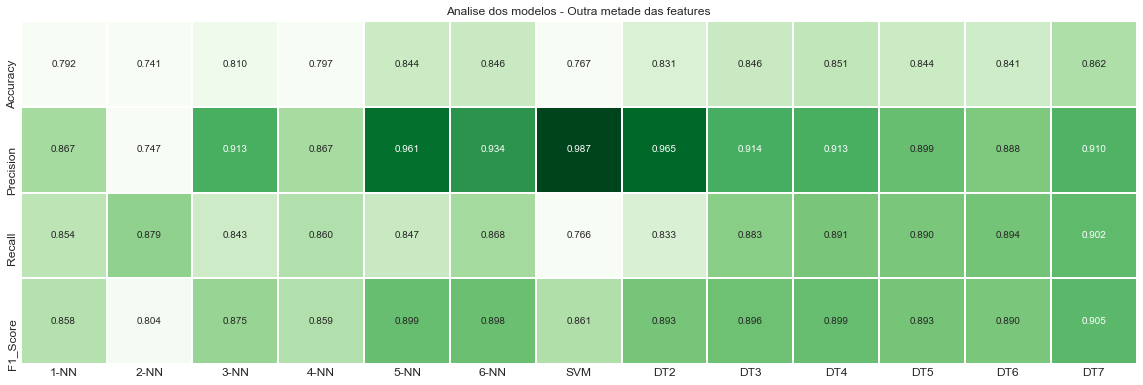

In [13]:
plt.figure(figsize=(20,20))
plt.title('Analise dos modelos - Outra metade das features')
sns.heatmap(analise_other_half, annot=True, square=True, cbar=False, fmt=".3f", linewidths=0.95, cmap='Greens', 
            vmin = 0.8)
pass

## Qual a correlação do 'status' (variável a ser predita) com as outras variáveis?

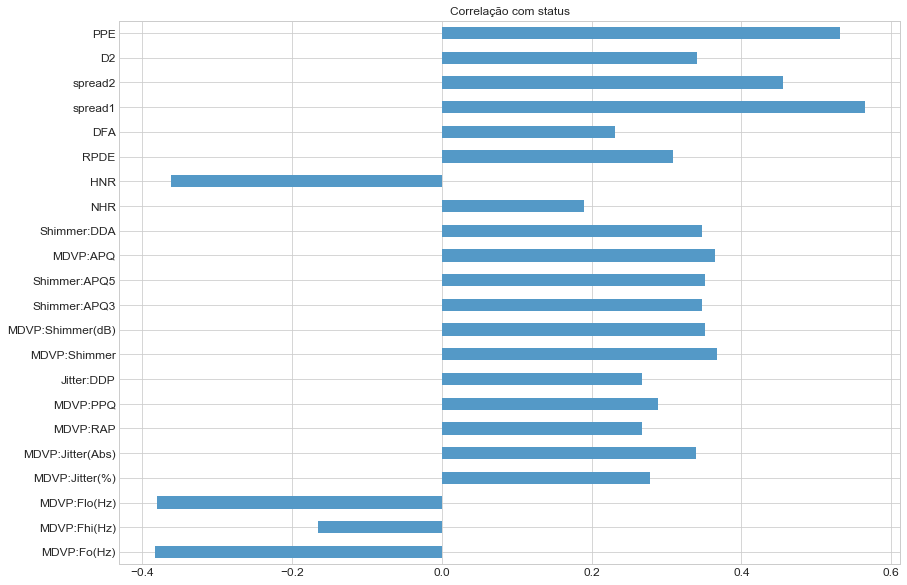

In [14]:
# Calculando a matriz de correlação
corr = dfParkinson.corr()

matplotlib.rcParams.update({'font.size': 15})

# Analisando as correlações de 'status' com as outras variáveis
c = corr['status'].drop('status')
c.plot(kind='barh', title = 'Correlação com status', figsize = (14,10), color = '#5499C7', grid = True)
pass

### Heatmap

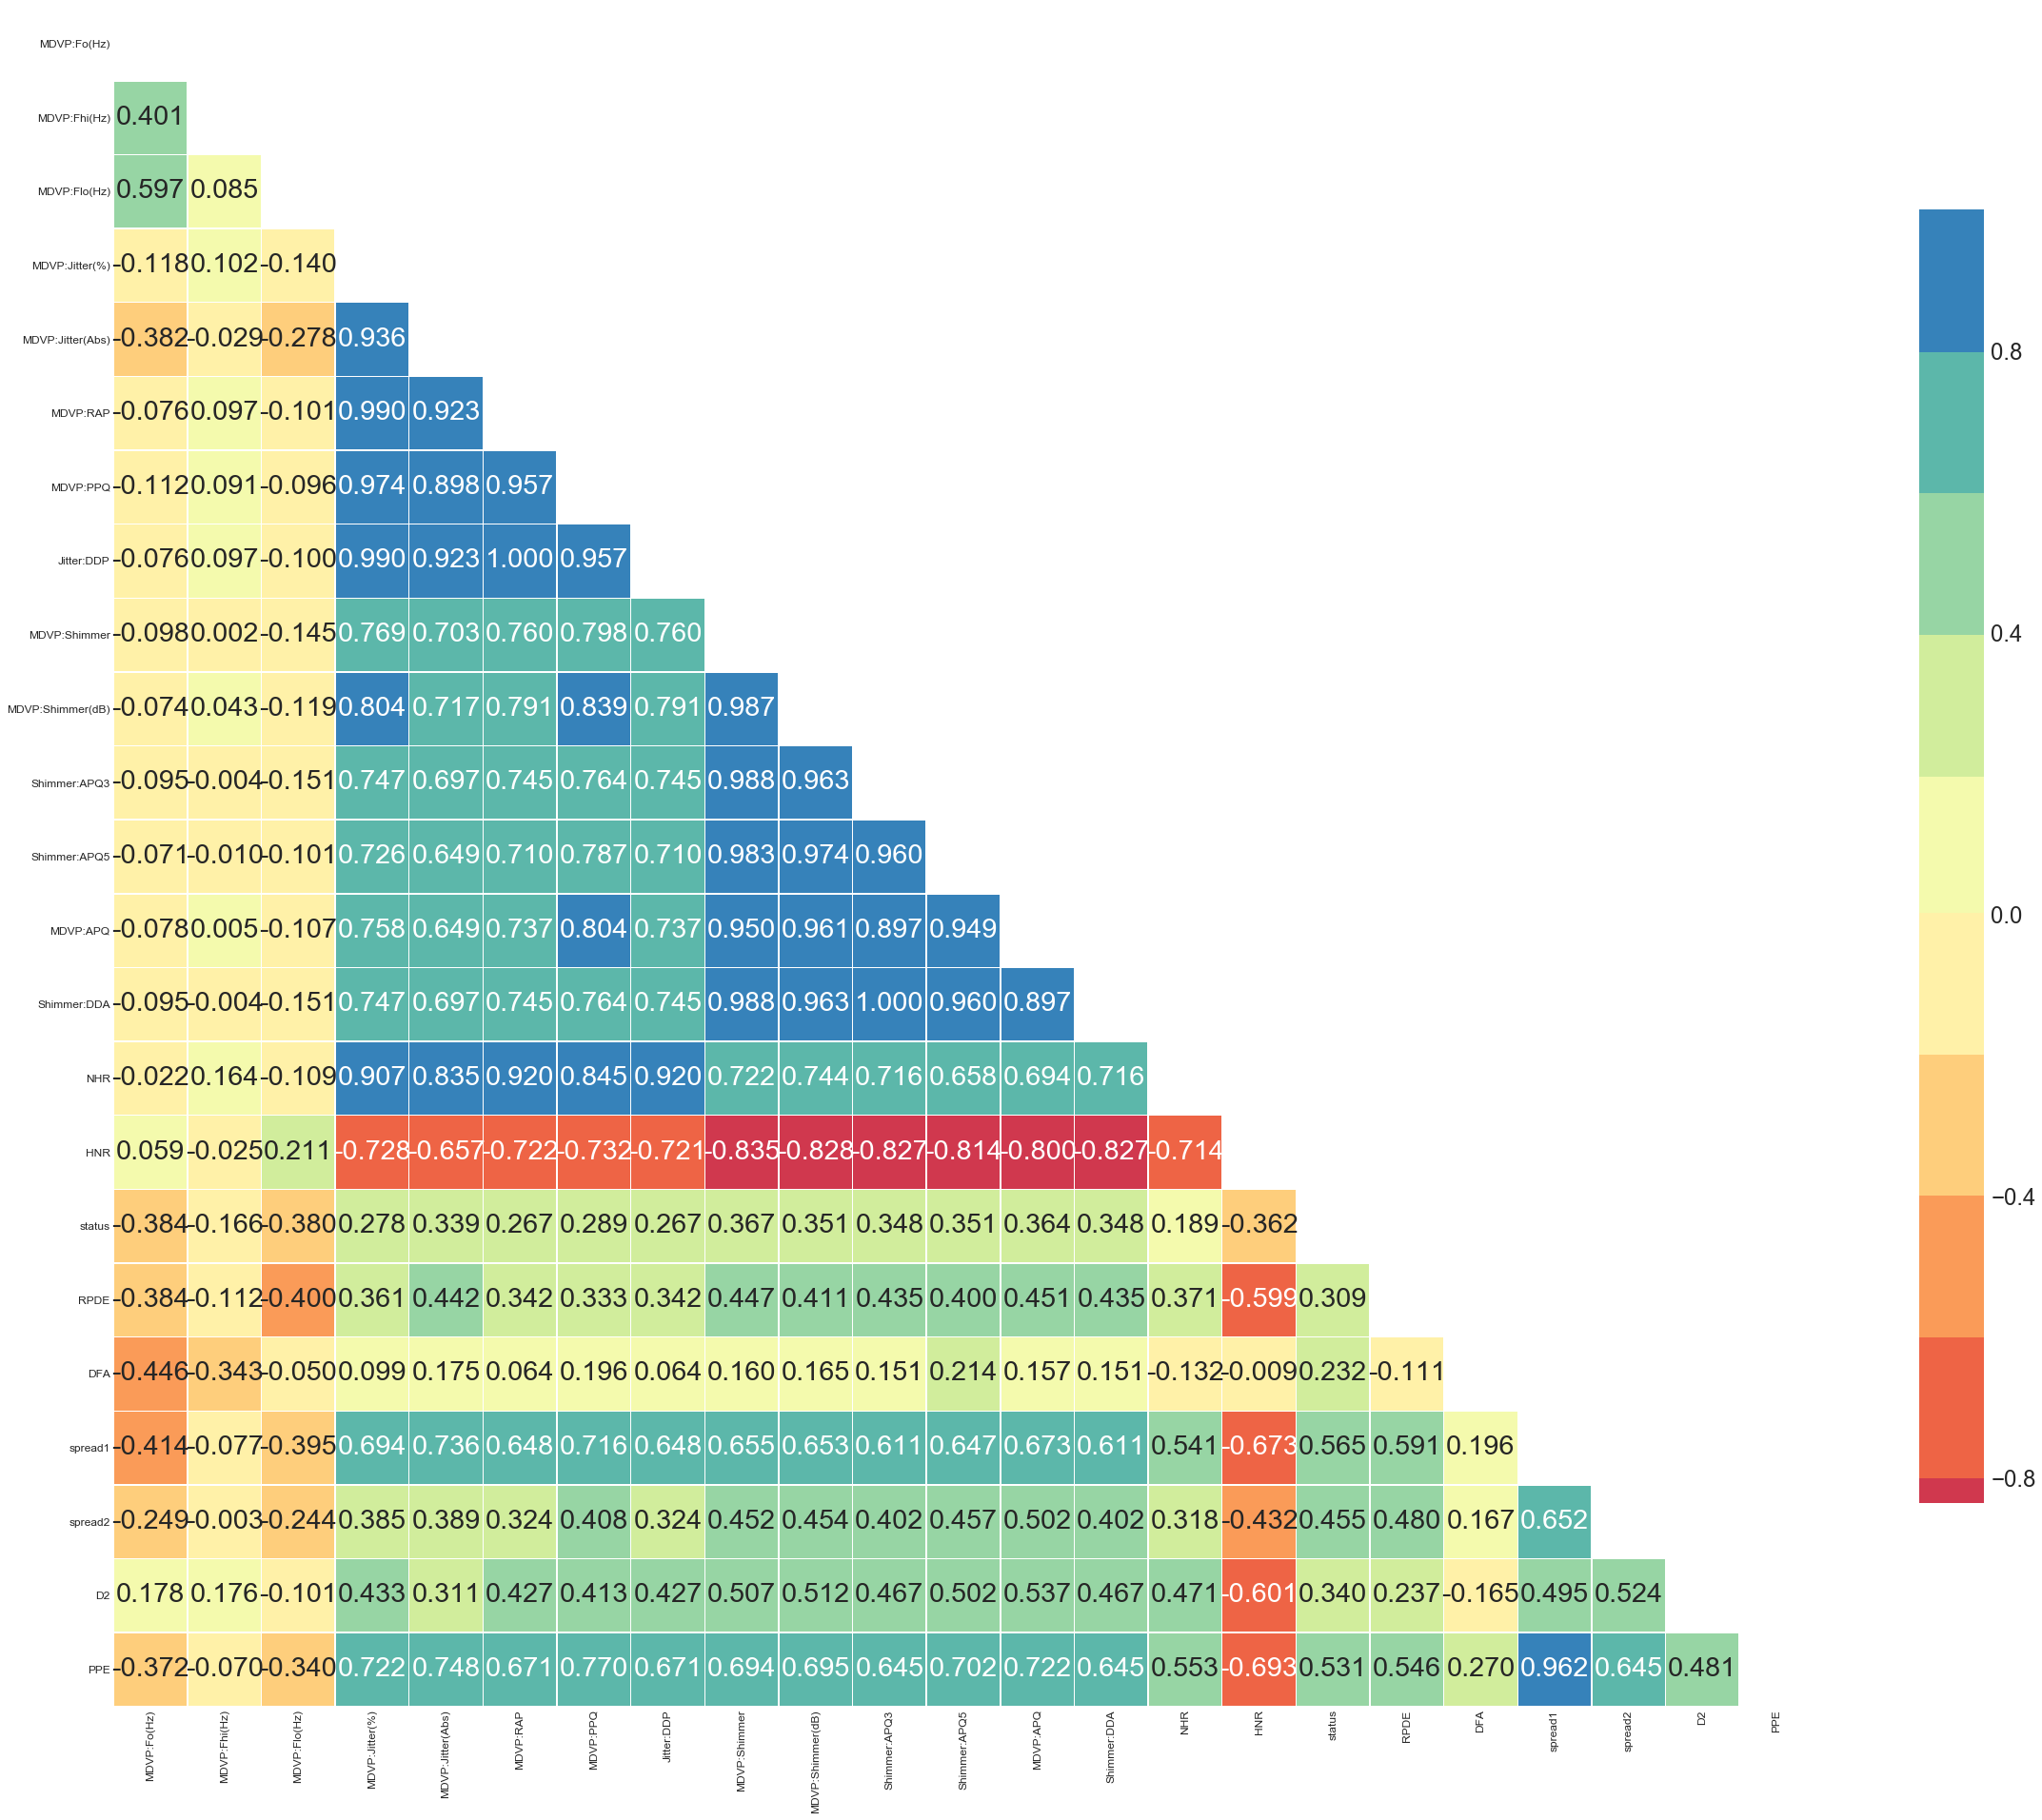

In [15]:
# Montando uma matriz de confusão com as correlações entre todas as variáveis
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(40,50))
cmap = sns.color_palette("Spectral", 10)

sns.set(font_scale=2.4)

ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Feature importance

[0.10166547 0.04471554 0.04859785 0.02461875 0.04685706 0.03859657
 0.04715174 0.03873381 0.04168144 0.02068281 0.04981385 0.04056882
 0.02625185 0.03581368 0.01820958 0.02943527 0.0426734  0.03645096
 0.08886004 0.0488867  0.04102534 0.08870948]


/Users/jessicavillar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


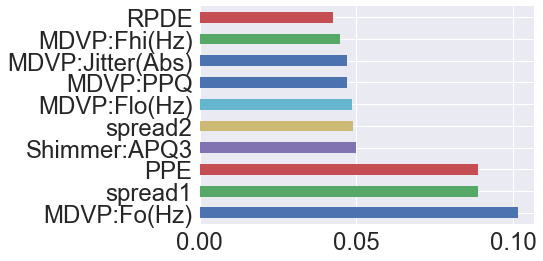

In [18]:
X = dfParkinson.drop('status',axis=1).iloc[:,1:]
y = dfParkinson['status']

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()